**Setup**

In [1]:
!pip install matplotlib
!pip install seaborn

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

<ipython-input-8-416c7a215848>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Dataset**

In [6]:
url = '/content/2019.csv'
data = pd.read_csv(url)

data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
data = data.drop('Country or region', axis = 1)

**Normalizing Data**

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [13]:
# Normalizing the Data
normalized_data = normalize(data_scaled)

In [14]:
# Converting the numpy array into a pandas DataFrame
normalized_data = pd.DataFrame(normalized_data)

In [15]:
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.760817,0.362417
1,-0.728674,0.514376


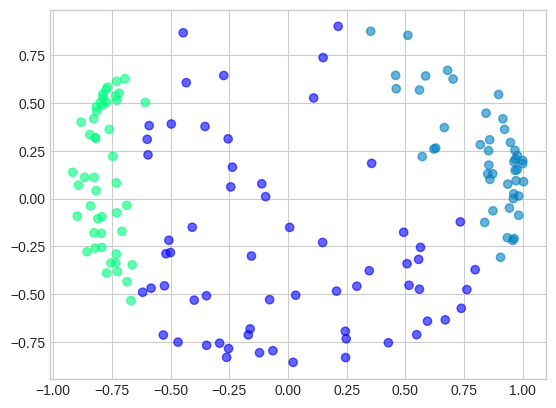

In [16]:
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6)
plt.show()

**Guassian Mixture Model (GMM)**

In [17]:
# Create and fit the GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(data_scaled)

# Predict the cluster for each data point
clusters = gmm.predict(data_scaled)

# Add the cluster assignments to our data
data['cluster'] = clusters

# Display the first few rows with cluster assignments
data.head()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [18]:
# Count the number of data points in each cluster
cluster_sizes = data['cluster'].value_counts()
cluster_sizes

0    74
1    53
2    29
Name: cluster, dtype: int64

In [19]:
# Compute mean values for each cluster
cluster_means = data.groupby('cluster').mean()
cluster_means


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
cluster,,,,,,,,
0,69.297297,5.591054,1.004203,1.328014,0.816122,0.373284,0.142365,0.066486
1,124.358491,4.301585,0.517283,0.891151,0.457453,0.342189,0.208208,0.098358
2,18.172414,6.958103,1.361241,1.485207,0.982759,0.533862,0.250552,0.245552


**Analyzing Clusters**

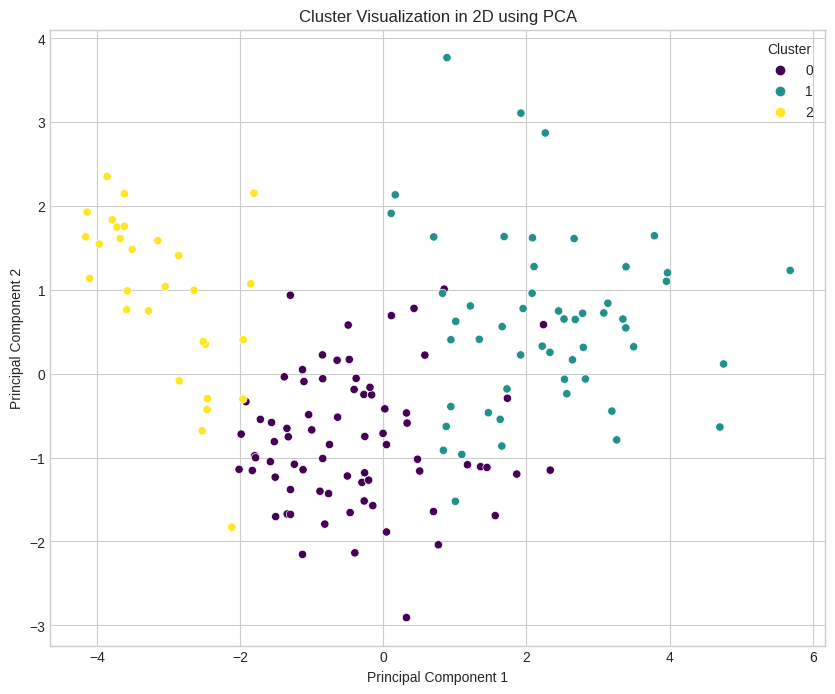

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Cluster Visualization in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
